In [11]:
!pip install spectral
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_classif
import os
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
## Basics
import gc
gc.collect()
import warnings
warnings.filterwarnings('ignore')
import time
import numpy
import numpy as np
from PIL import Image
from operator import truediv
import scipy.io as sio
import os
import pandas as pd
import seaborn as sns
import spectral
## Ploting
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
%matplotlib inline
## Sklearn
import sklearn as sk
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import IncrementalPCA, NMF
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.decomposition import IncrementalPCA
## Deep Model
import keras
import h5py
from keras.layers import Dropout, Input, Conv2D, Conv3D, MaxPool3D, Flatten, Dense, Reshape, BatchNormalization
from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
from keras.models import Sequential, Model
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
## Mounting Colab
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
## Split Training, Validation and Test Sets
def SplitTr_Te(HSI, GT, TeRatio, randomState=345):
    Tr, Te, TrC, TeC = train_test_split(HSI, GT, test_size=TeRatio, random_state=randomState, stratify=GT)
    return Tr, Te, TrC, TeC

In [13]:
'' ## Dimensional Reduction Method
'''def DL_Method(HSI, numComponents=2, perplexity=30, learning_rate=200):
    # Reshape HSI to a 2D matrix
    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))

    # Initialize t-SNE model
    tsne = TSNE(n_components=numComponents, perplexity=perplexity, learning_rate=learning_rate)

    # Transform data using t-SNE
    X_tsne = tsne.fit_transform(RHSI)

    # Reshape back to the original HSI shape
    reduced_HSI = np.reshape(X_tsne, (HSI.shape[0], HSI.shape[1], numComponents))

    return reduced_HSI'''

'''def DL_Method(HSI, numFeatures=75):
    # Reshape HSI to a 2D matrix
    RHSI = HSI.reshape(-1, HSI.shape[2])

    # Standardize the features
    scaler = StandardScaler()
    RHSI_scaled = scaler.fit_transform(RHSI)

    # Calculate mutual information scores between features and target (target is also RHSI_scaled)
    mi_scores = mutual_info_regression(RHSI_scaled, RHSI_scaled)

    # Select top 'numFeatures' features based on highest mutual information scores
    selected_feature_indices = np.argsort(mi_scores)[-numFeatures:]
    selected_features = RHSI_scaled[:, selected_feature_indices]

    # Reshape back to the original HSI shape
    reduced_HSI = selected_features.reshape((HSI.shape[0], HSI.shape[1], numFeatures))

    return reduced_HSI'''
'''def DL_Method(HSI, n_estimators=100):
    # Reshape HSI to a 2D matrix
    RHSI = HSI.reshape(-1, HSI.shape[2])

    # Standardize the features
    scaler = StandardScaler()
    RHSI_scaled = scaler.fit_transform(RHSI)

    # Train a Random Forest model for feature importance
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    rf.fit(RHSI_scaled, RHSI_scaled)

    # Get feature importance scores from the trained model
    feature_importance = rf.feature_importances_

    # Select features based on non-zero importance scores
    selected_features = RHSI_scaled[:, feature_importance != 0]

    # Reshape back to the original HSI shape
    reduced_HSI = selected_features.reshape((HSI.shape[0], HSI.shape[1], selected_features.shape[1]))

    return reduced_HSI'''
"""def DL_Method(HSI, numComponents=75, alpha=1.0):
    # Reshape HSI to a 2D matrix
    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))

    # Standardize the features
    scaler = StandardScaler()
    RHSI_scaled = scaler.fit_transform(RHSI)

    # Train a Lasso regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(RHSI_scaled, RHSI_scaled)

    # Get the learned coefficients (feature importance scores)
    feature_importance = lasso.coef_

    # Select top 'numComponents' features based on highest feature importance scores
    selected_feature_indices = np.argsort(np.abs(feature_importance))[-numComponents:]
    selected_features = RHSI_scaled[:, selected_feature_indices]

    # Reshape back to the original HSI shape
    reduced_HSI = np.reshape(selected_features, (HSI.shape[0], HSI.shape[1], numComponents))

    return reduced_HSI"""
## Dimensional Reduction Method
'''def DL_Method(HSI, numComponents = 75):
    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))
    pca = PCA(n_components=numComponents)
    X_pca = pca.fit_transform(RHSI)
    RHSI = np.reshape(X_pca, (HSI.shape[0], HSI.shape[1], numComponents))
    return RHSI'''
def DL_Method(HSI, numComponents = 75):
    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))
    n_batches = 256
    inc_pca = IncrementalPCA(n_components=numComponents)
    for X_batch in np.array_split(RHSI, n_batches):
        inc_pca.partial_fit(X_batch)
    X_ipca = inc_pca.transform(RHSI)
    RHSI = np.reshape(X_ipca, (HSI.shape[0],HSI.shape[1], numComponents))
    return RHSI
'''def DL_Method_FA(HSI, numComponents = 75):
    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))
    n_batches = 256
    inc_fa = FactorAnalysis(n_components=numComponents)
    for X_batch in np.array_split(RHSI, n_batches):
        inc_fa.partial_fit(X_batch)
    X_ifa = inc_fa.transform(RHSI)
    RHSI = np.reshape(X_ifa, (HSI.shape[0],HSI.shape[1], numComponents))
    return RHSI'''
'''def DL_Method_LDA(HSI, numComponents = 75):
    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))
    n_batches = 256
    lda = LinearDiscriminantAnalysis(n_components=numComponents)
    for X_batch in np.array_split(RHSI, n_batches):
        lda.fit(X_batch, y=None)
    X_lda = lda.transform(RHSI)
    RHSI = np.reshape(X_lda, (HSI.shape[0],HSI.shape[1], numComponents))
    return RHSI'''
'''def DL_Method_QDA(HSI, numComponents = 75):
    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))
    n_batches = 256
    qda = QuadraticDiscriminantAnalysis(n_components=numComponents)
    for X_batch in np.array_split(RHSI, n_batches):
        qda.fit(X_batch, y=None)
    X_qda = qda.transform(RHSI)
    RHSI = np.reshape(X_qda, (HSI.shape[0],HSI.shape[1], numComponents))
    return RHSI'''
'''def DL_Method_CFS(HSI, numComponents=75):
    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))
    n_batches = 256
    cfs = CFS(n_features=numComponents)
    for X_batch in np.array_split(RHSI, n_batches):
        cfs.fit(X_batch, y=None)
    X_cfs = cfs.transform(RHSI)
    RHSI = np.reshape(X_cfs, (HSI.shape[0], HSI.shape[1], numComponents))
    return RHSI'''

#rfe
'''def DL_Method(HSI, numComponents=75):
    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))
    n_batches = 256

    estimator = LinearRegression()  # Use LinearRegression as the estimator
    selector = RFE(estimator, n_features_to_select=numComponents)
    selected_features = selector.fit_transform(RHSI, RHSI)

    RHSI = np.reshape(selected_features, (HSI.shape[0], HSI.shape[1], numComponents))
    return RHSI'''

'''def DL_Method(HSI, numComponents=75):
    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))
    n_batches = 256

    # Perform NMF dimensionality reduction
    nmf = NMF(n_components=numComponents)
    X_nmf = nmf.fit_transform(RHSI)

    inc_pca = IncrementalPCA(n_components=numComponents)

    for X_batch in np.array_split(X_nmf, n_batches):
        inc_pca.partial_fit(X_batch)

    X_ipca = inc_pca.transform(X_nmf)
    RHSI = np.reshape(X_ipca, (HSI.shape[0], HSI.shape[1], numComponents))

    return RHSI'''

    #mifs
'''def DL_Method_MIFS(HSI, numComponents=75):

    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))
    n_batches = 256

    # Calculate mutual information scores for feature selection
    mutual_info_scores = mutual_info_classif(RHSI, y=None, discrete_values='auto')

    # Sort indices of features based on mutual information scores
    selected_feature_indices = np.argsort(mutual_info_scores)[::-1][:numComponents]

    selected_features = RHSI[:, selected_feature_indices]

    # Reshape the selected features back to the original shape
    RHSI = np.reshape(selected_features, (HSI.shape[0], HSI.shape[1], numComponents))

    return RHSI'''

"def DL_Method_MIFS(HSI, numComponents=75):\n\n    RHSI = np.reshape(HSI, (-1, HSI.shape[2]))\n    n_batches = 256\n\n    # Calculate mutual information scores for feature selection\n    mutual_info_scores = mutual_info_classif(RHSI, y=None, discrete_values='auto')\n\n    # Sort indices of features based on mutual information scores\n    selected_feature_indices = np.argsort(mutual_info_scores)[::-1][:numComponents]\n\n    selected_features = RHSI[:, selected_feature_indices]\n\n    # Reshape the selected features back to the original shape\n    RHSI = np.reshape(selected_features, (HSI.shape[0], HSI.shape[1], numComponents))\n\n    return RHSI"

In [14]:
## Padding
def ZeroPad(HSI, margin=2):
    NHSI = np.zeros((HSI.shape[0] + 2 * margin, HSI.shape[1] + 2* margin, HSI.shape[2]))
    x_offset = margin
    y_offset = margin
    NHSI[x_offset:HSI.shape[0] + x_offset, y_offset:HSI.shape[1] + y_offset, :] = HSI
    return NHSI

In [15]:
## Spatial Patches in 3D
def HSICubes(HSI, GT, WinSize=5, removeZeroLabels = True):
    margin = int((WinSize - 1) / 2)
    zeroPaddedX = ZeroPad(HSI, margin=margin)
    # split patches
    patchesData = np.zeros((HSI.shape[0] * HSI.shape[1], WinSize, WinSize, HSI.shape[2]))
    patchesLabels = np.zeros((HSI.shape[0] * HSI.shape[1]))
    patchIndex = 0
    for r in range(margin, zeroPaddedX.shape[0] - margin):
        for c in range(margin, zeroPaddedX.shape[1] - margin):
            patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1]
            patchesData[patchIndex, :, :, :] = patch
            patchesLabels[patchIndex] = GT[r-margin, c-margin]
            patchIndex = patchIndex + 1
    if removeZeroLabels:
        patchesData = patchesData[patchesLabels>0,:,:,:]
        patchesLabels = patchesLabels[patchesLabels>0]
        patchesLabels -= 1
    return patchesData, patchesLabels

In [16]:
## Compute Per Class Accuacy form Confusion Matrix
def AA_andEachClassAccuracy(confusion_matrix):
    counter = confusion_matrix.shape[0]
    list_diag = np.diag(confusion_matrix)
    list_raw_sum = np.sum(confusion_matrix, axis=1)
    each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
    average_acc = np.mean(each_acc)
    return each_acc, average_acc

In [17]:
## Assigning Class Labels and Computing the Test Accuracy
def reports(Te,TeC):
    start = time.time()
    Y_pred = model.predict(Te)
    y_pred = np.argmax(Y_pred, axis=1)
    end = time.time()
    total = end - start
    target_names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn'
                        ,'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed',
                        'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
                        'Soybean-clean', 'Wheat', 'Woods', 'Buildings-Grass-Trees-Drives',
                        'Stone-Steel-Towers']
    classification = classification_report(np.argmax(TeC, axis=1), y_pred, target_names=target_names)
    oa = accuracy_score(np.argmax(TeC, axis=1), y_pred)
    confusion = confusion_matrix(np.argmax(TeC, axis=1), y_pred)
    each_acc, aa = AA_andEachClassAccuracy(confusion)
    kappa = cohen_kappa_score(np.argmax(TeC, axis=1), y_pred)
    score = model.evaluate(Te, TeC, batch_size=32)
    Test_Loss =  score[0]*100
    Test_accuracy = score[1]*100
    return classification, confusion, Test_Loss, Test_accuracy, oa*100, each_acc*100, aa*100, kappa*100, target_names, y_pred, total

In [18]:
## Compute the Patch to Prepare for Ground Truths
def Patch(data,height_index,width_index):
    height_slice = slice(height_index, height_index+PATCH_SIZE)
    width_slice = slice(width_index, width_index+PATCH_SIZE)
    patch = data[height_slice, width_slice, :]
    return patch

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11, 11, 20, 1)]   0         
                                                                 
 conv3d_4 (Conv3D)           (None, 9, 9, 14, 16)      1024      
                                                                 
 conv3d_5 (Conv3D)           (None, 7, 7, 10, 32)      23072     
                                                                 
 conv3d_6 (Conv3D)           (None, 5, 5, 8, 64)       55360     
                                                                 
 conv3d_7 (Conv3D)           (None, 3, 3, 6, 128)      221312    
                                                                 
 flatten_1 (Flatten)         (None, 6912)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               1769

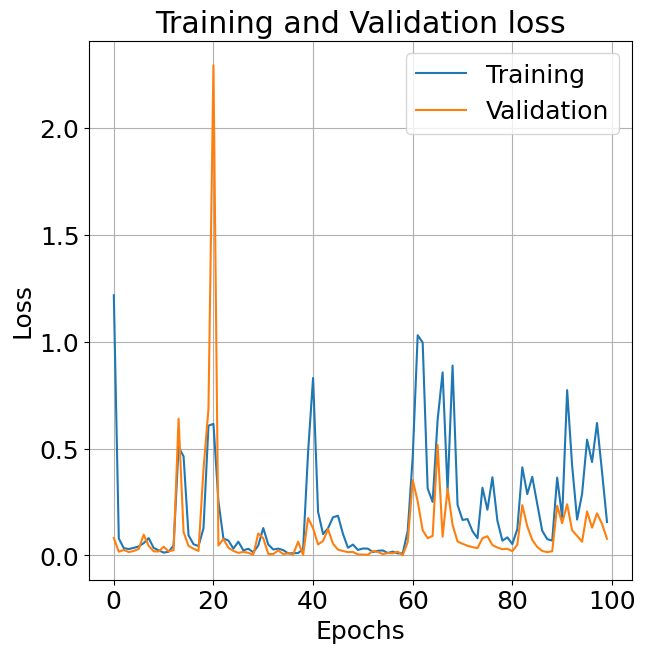

                              precision    recall  f1-score   support

                     Alfalfa       1.00      1.00      1.00       804
                 Corn-notill       1.00      1.00      1.00      1490
                Corn-mintill       1.00      0.99      0.99       790
                        Corn       1.00      0.95      0.98       558
               Grass-pasture       1.00      0.99      1.00      1071
                 Grass-trees       1.00      0.99      0.99      1584
         Grass-pasture-mowed       1.00      0.97      0.98      1432
               Hay-windrowed       0.98      0.97      0.98      4509
                        Oats       1.00      1.00      1.00      2481
              Soybean-notill       1.00      0.98      0.99      1311
             Soybean-mintill       1.00      1.00      1.00       427
               Soybean-clean       1.00      1.00      1.00       771
                       Wheat       1.00      1.00      1.00       366
                   

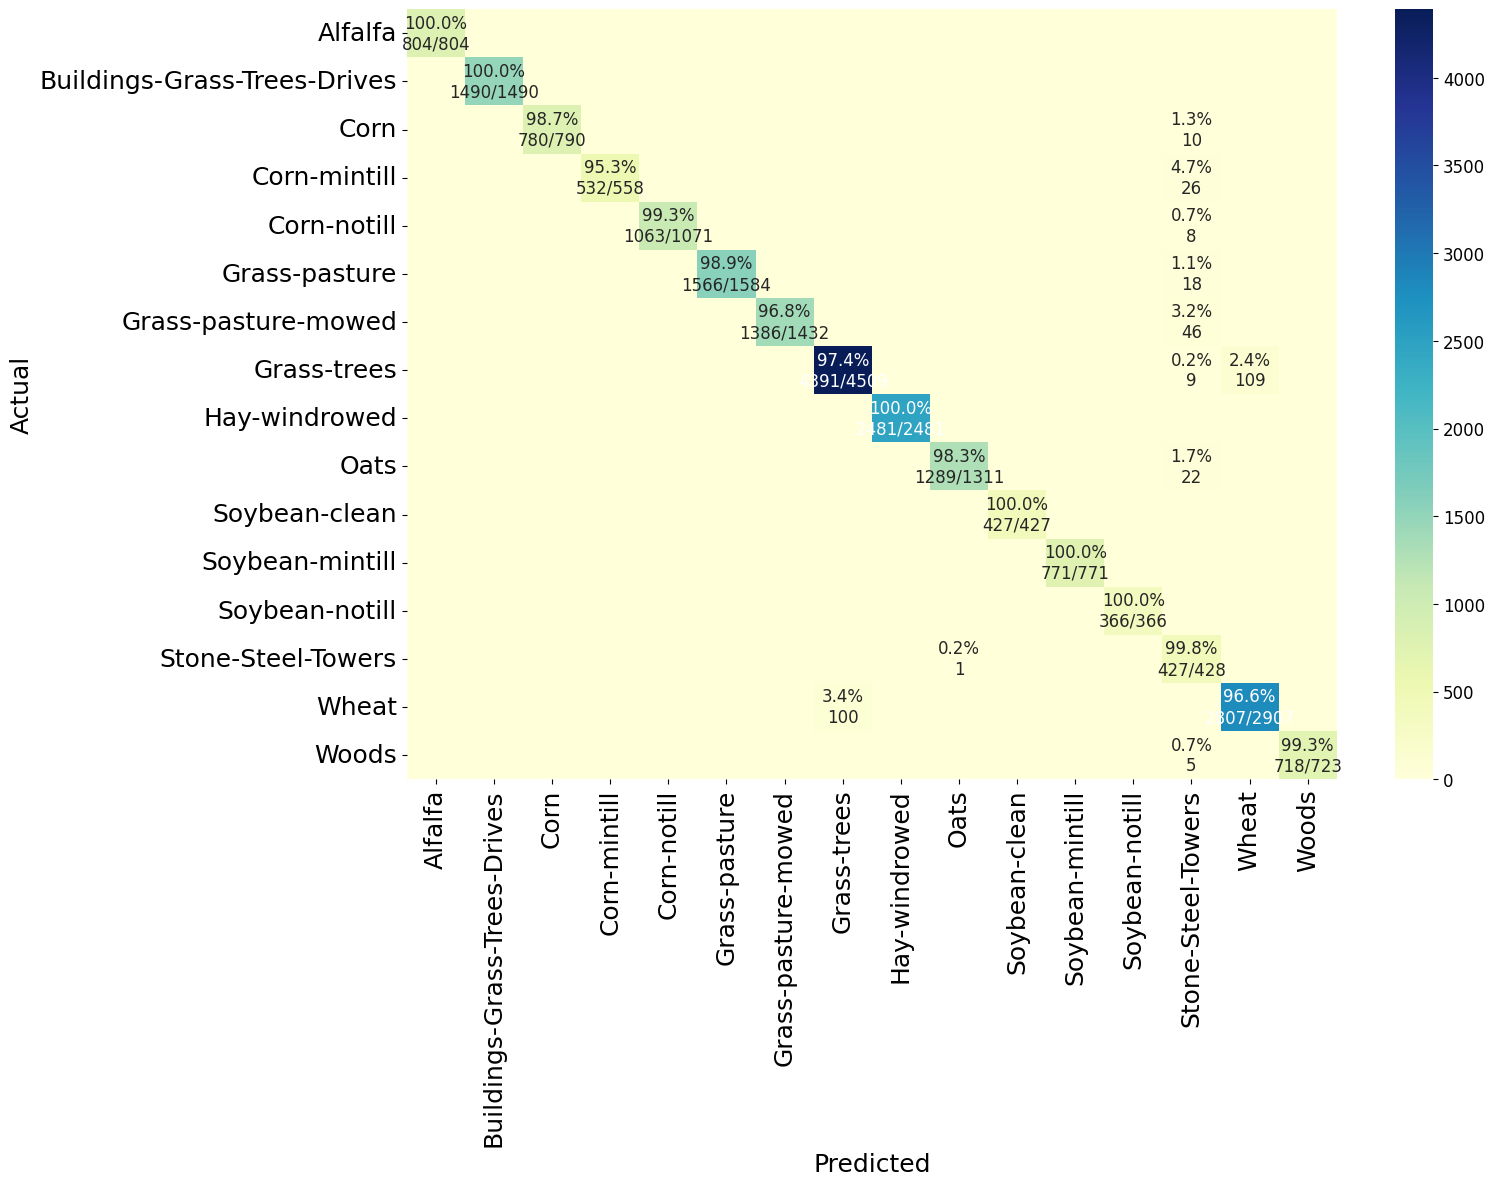

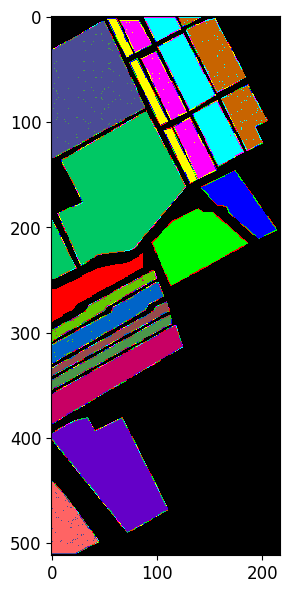

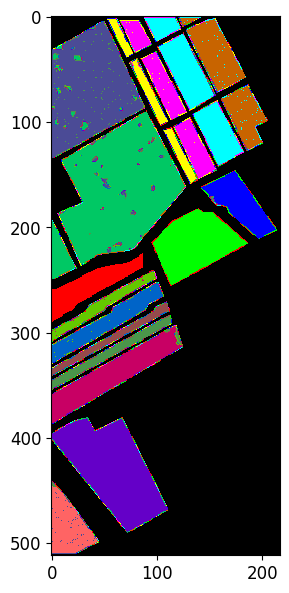

In [19]:
## Loading Dataset
## There is a typo in the paper on page#4 Table#4, the training samples are not 10%, the reported accuracies are obtained with almost 30~40% training samples.
# Loading Dataset
data_path = os.path.join(os.getcwd(),'/content/drive/MyDrive/indian_pines')
HSI = sio.loadmat(os.path.join(data_path, '/content/drive/MyDrive/indian_pines/Salinas_corrected.mat'))['salinas_corrected']
GT = sio.loadmat(os.path.join(data_path, '/content/drive/MyDrive/indian_pines/Salinas_gt.mat'))['salinas_gt']
HSI.shape, GT.shape
## Reduce the Dimensionality
HSI = DL_Method(HSI, numComponents=20)
HSI.shape
## Create Image Cubes for Model Building
HSI, GT = HSICubes(HSI, GT, WinSize=11)
HSI.shape, GT.shape
## Split Train and Test sets
Tr, Te, TrC, TeC = SplitTr_Te(HSI, GT, 0.40)
Tr.shape, Te.shape, TrC.shape, TeC.shape
## Split Train and Validation
Tr, Tv, TrC, TvC = SplitTr_Te(Tr, TrC, 0.30)
Tr.shape, Tv.shape, TrC.shape, TvC.shape
## Model Pre requsites
Tr = Tr.reshape(-1, 11, 11, 20, 1)
TrC = np_utils.to_categorical(TrC)
Tv = Tv.reshape(-1, 11, 11, 20, 1)
TvC = np_utils.to_categorical(TvC)
Tr.shape, TrC.shape, Tv.shape, TvC.shape
## Model Structure
## Input layer
input_layer = Input((11, 11, 20, 1))
## 3D Convolutional Layers
conv_layer1 = Conv3D(filters=16, kernel_size=(3, 3, 7), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=32, kernel_size=(3, 3, 5), activation='relu')(conv_layer1)
conv_layer3 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu')(conv_layer2)
conv_layer4 = Conv3D(filters=128, kernel_size=(3, 3, 3), activation='relu')(conv_layer3)
## Faltten 3D Convolutional Layer
flatten_layer = Flatten()(conv_layer4)
## Fully Connected Layers
dense_layer1 = Dense(units=256, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=128, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=16, activation='softmax')(dense_layer2)

# define the model with input layer and output layer
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()
# compiling the model
adam = Adam(lr=0.001, decay=1e-06)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
## Training Time and Fit the Model
start = time.time()
history = model.fit(x=Tr, y=TrC, batch_size=256, epochs=100, validation_data=(Tv, TvC))
end = time.time()
Tr_Time = end - start
## Plot Training and Validation loss and Accuracy
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation loss')
plt.legend(['Training','Validation'], loc='upper right')
plt.savefig("IP_loss.eps")
plt.show()
'''## Plot Training and Validation Accuracy
plt.figure(figsize=(7,7))
plt.ylim(0,1.1)
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy')
plt.legend(['Training','Validation'])
plt.savefig("IP_Accuracy.eps")
plt.show()'''
## Testing Phase
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
## Reshape Test Data
Te = Te.reshape(-1, 11, 11, 20, 1)
TeC = np_utils.to_categorical(TeC)
Te.shape, TeC.shape
## Computing and Writing the Accuacy in .txt file
classification,confusion,Test_loss,Test_accuracy,oa,each_acc,aa,kappa,target_names,y_pred,Time = reports(Te,TeC)
classification = str(classification)
confusion = str(confusion)
print(classification), print(Test_accuracy), print(oa), print(aa), print(Tr_Time), print(Time)
## Draw Confusion Matrix
confusion = confusion_matrix(np.argmax(TeC, axis=1), y_pred, labels=np.unique(np.argmax(TeC, axis=1)))
cm_sum = np.sum(confusion, axis=1, keepdims=True)
cm_perc = confusion / cm_sum.astype(float) * 100
annot = np.empty_like(confusion).astype(str)
nrows, ncols = confusion.shape
for i in range(nrows):
    for j in range(ncols):
        c = confusion[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)
cm = pd.DataFrame(confusion, index=np.unique(target_names), columns=np.unique(target_names))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(15,10))
plt.rcParams.update({'font.size': 12})
sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
## Loading Dataset
data_path = os.path.join(os.getcwd(),'/content/drive/MyDrive/indian_pines')
HSI = sio.loadmat(os.path.join(data_path, '/content/drive/MyDrive/indian_pines/Salinas_corrected.mat'))['salinas_corrected']
GT = sio.loadmat(os.path.join(data_path, '/content/drive/MyDrive/indian_pines/Salinas_gt.mat'))['salinas_gt']
## Check the Dimensions of HSI
height = GT.shape[0]
width = GT.shape[1]
PATCH_SIZE = 11
## Dimensional Reduction and zero padding
HSI = DL_Method(HSI, numComponents=20)
HSI.shape
HSI = ZeroPad(HSI, 11//2)
## Calculate the predicted Ground Truths
outputs = np.zeros((height,width))
for i in range(height):
    for j in range(width):
        target = int(GT[i,j])
        if target == 0 :
            continue
        else :
            image_patch=Patch(HSI,i,j)
            X_test_image = image_patch.reshape(1,image_patch.shape[0],
                                               image_patch.shape[1], image_patch.shape[2], 1).astype('float32')
            prediction = (model.predict(X_test_image))
            prediction = np.argmax(prediction, axis=1)
            outputs[i][j] = prediction+1
## Show Ground Truths
ground_truth = spectral.imshow(classes = GT,figsize =(7,7))
predict_image = spectral.imshow(classes = outputs.astype(int),figsize =(7,7))
spectral.save_rgb("predictions.png", outputs.astype(int), colors=spectral.spy_colors)
spectral.save_rgb("ground_truth.png", GT, colors=spectral.spy_colors)


In [20]:

HSI.shape



(522, 227, 20)